<a href="https://colab.research.google.com/github/Marwenboughanmi/Final-project/blob/main/Gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import pickle

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import tensorflow and keras
# check that tensorflow version is 2.18.0 or above
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.18.0


In [4]:
# make a function to preprocess the image
def preprocessing_image(img):
    """ This function will take an image as an input. Resize its dimensions to 128 x 128, convert it to grayscale,
    convert the image into numpy array cotaining float numbers and normalize the values. Reshape the array so it is (128, 128, 1) to prepared to feed into the model for classification.
    """
    target_size = (128, 128)
    resized_img = img.resize(target_size, resample = Image.LANCZOS)
    grayscaled_img = resized_img.convert('L')
    img_array = np.array(grayscaled_img).astype(np.float32)
    normailized_img = img_array / 255.0

    return normailized_img



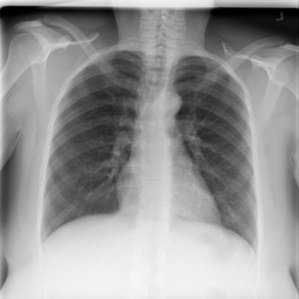

In [13]:
# Load the images from the pkl file
with open('/content/drive/My Drive/Final-project/img.pkl', 'rb') as file:
    images = pickle.load(file)

images[0]

In [14]:
# test the preprocessing_image function
img_processed = preprocessing_image(images[0])
img_processed.shape

(128, 128)

In [5]:
# Load the model to a new object
model = tf.keras.models.load_model('/content/drive/MyDrive/Final-project/x-ray_classifier_128.keras')

In [ ]:
# extract the y from the predction array
prediction = model.predict(np.array([img_processed]))
prediction[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1.5973961e-05

In [6]:
# make a function that uses the model to create a prediction
def get_prediction(img):
  """
  """
  try:
    img_processed = preprocessing_image(img)
    prediction = model.predict(np.array([img_processed]))
    if prediction[0][0] >= 0.5:
      pred = 'Abnormal'
    elif prediction[0][0] < 0.5:
      pred = 'Normal'
    return pred

  except Exception as e:
    print(e)


In [15]:
# test the get_prediction function
get_prediction(images[17396])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


'Abnormal'

In [16]:
# read in the dataframe of images paths and labels
df = pd.read_csv('/content/drive/MyDrive/Final-project/merged_image_data.csv')


In [ ]:
# look at the label of the image in the data frame to confirm the model's prediction
df.iloc[17396]

,17396
image_path,./Lung_Opacity/images/Lung_Opacity-551.png
label,Lung_Opacity-551.png


In [10]:
# # install gradio if haven't before
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [11]:
import gradio as gr

In [12]:
# create an instance of gradio Interface
# set input as image and output as a textbox

app= gr.Interface(fn = get_prediction,
                  title= "X-ray Classifier",
                 inputs= [gr.Image(label = "Chest X-ray image", type = "pil")],
                 outputs= [gr.Textbox(label = "Classification")])
# lauch the app
app.launch(share= True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e1a56b258f18d702fd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
